# Preprocessing

In [2]:
import pandas as pd
path = 'C:/Users/Leon/Documents/Jupyter/softdes/27800394/Dataset/Combined Data/Combined_dataset.csv'
water_df = pd.read_csv(path)

In [3]:
df = water_df.copy()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

#separate Date into Year, Month, Day columns
# Insert after Date (at index of Date + 1, +2, +3)
date_idx = df.columns.get_loc('Date')

df.insert(date_idx + 1, 'Year', df['Date'].dt.year)
df.insert(date_idx + 2, 'Month', df['Date'].dt.month)
df.insert(date_idx + 3, 'Day', df['Date'].dt.day)

df = df.drop(columns=['Date'])

df.head()

,Country,Area,Waterbody Type,Year,Month,Day,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,Canada,SE649035-145565,River,1974,1,12,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,11.73155,100.0,Excellent
1,Canada,SE649035-145565,River,1975,1,12,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,11.82009,100.0,Excellent
2,Canada,SE649035-145565,River,1976,1,12,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,14.87472,100.0,Excellent
3,Canada,SE649035-145565,River,1977,1,12,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,15.89293,100.0,Excellent
4,Canada,SE649035-145565,River,1978,1,12,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,15.22888,100.0,Excellent


In [4]:
freshwater_types = ['River', 'Effluent', 'Sewage', 'Lake', 'Canal', 'Drainage']
df_fresh = df[df['Waterbody Type'].isin(freshwater_types)]
df_fresh['Waterbody Type'].value_counts()

Waterbody Type
River       1852579
Effluent     601550
Lake         153603
Canal         28574
Sewage        23777
Drainage      10205
Name: count, dtype: int64

In [5]:
print("Number of datapoints (rows):", df_fresh.shape[0])

Number of datapoints (rows): 2670288


In [6]:
df_fresh_2000 = df_fresh[df_fresh['Year'] >= 2000]
print("Number of datapoints (rows):", df_fresh_2000.shape[0])

Number of datapoints (rows): 2427809


In [7]:
print(list(df_fresh_2000.columns))

['Country', 'Area', 'Waterbody Type', 'Year', 'Month', 'Day', 'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)', 'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)', 'pH (ph units)', 'Temperature (cel)', 'Nitrogen (mg/l)', 'Nitrate (mg/l)', 'CCME_Values', 'CCME_WQI']


# Outlier management

In [8]:
df_filtered = df_fresh_2000.copy()
Q1 = df_filtered['Ammonia (mg/l)'].quantile(0.25)
Q3 = df_filtered['Ammonia (mg/l)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR   
df_filtered = df_filtered[(df_filtered['Ammonia (mg/l)'] >= lower_bound) & (df_filtered['Ammonia (mg/l)'] <= upper_bound)]
df_filtered.count()

Country                             2074849
Area                                2074849
Waterbody Type                      2074849
Year                                2074849
Month                               2074849
Day                                 2074849
Ammonia (mg/l)                      2074849
Biochemical Oxygen Demand (mg/l)    2074849
Dissolved Oxygen (mg/l)             2074849
Orthophosphate (mg/l)               2074849
pH (ph units)                       2074849
Temperature (cel)                   2074849
Nitrogen (mg/l)                     2074849
Nitrate (mg/l)                      2074849
CCME_Values                         2074849
CCME_WQI                            2074849
dtype: int64

In [ ]:
Q1 = df_filtered['pH (ph units)'].quantile(0.25)
Q3 = df_filtered['pH (ph units)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR   
df_filtered = df_filtered[(df_filtered['pH (ph units)'] >= lower_bound) & (df_filtered['pH (ph units)'] <= upper_bound)]
df_filtered.count()

Country                             1842695
Area                                1842695
Waterbody Type                      1842695
Year                                1842695
Month                               1842695
Day                                 1842695
Ammonia (mg/l)                      1842695
Biochemical Oxygen Demand (mg/l)    1842695
Dissolved Oxygen (mg/l)             1842695
Orthophosphate (mg/l)               1842695
pH (ph units)                       1842695
Temperature (cel)                   1842695
Nitrogen (mg/l)                     1842695
Nitrate (mg/l)                      1842695
CCME_Values                         1842695
CCME_WQI                            1842695
dtype: int64

In [10]:
Q1 = df_filtered['Nitrate (mg/l)'].quantile(0.25)
Q3 = df_filtered['Nitrate (mg/l)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR   
df_filtered = df_filtered[(df_filtered['Nitrate (mg/l)'] >= lower_bound) & (df_filtered['Nitrate (mg/l)'] <= upper_bound)]
df_filtered.count()

Country                             1674462
Area                                1674462
Waterbody Type                      1674462
Year                                1674462
Month                               1674462
Day                                 1674462
Ammonia (mg/l)                      1674462
Biochemical Oxygen Demand (mg/l)    1674462
Dissolved Oxygen (mg/l)             1674462
Orthophosphate (mg/l)               1674462
pH (ph units)                       1674462
Temperature (cel)                   1674462
Nitrogen (mg/l)                     1674462
Nitrate (mg/l)                      1674462
CCME_Values                         1674462
CCME_WQI                            1674462
dtype: int64

# Label encoding

In [11]:
df_mapped = df_filtered.copy()

mapping = {
    "Excellent": 5,
    "Good": 4,
    "Fair": 3,
    "Marginal": 2,
    "Poor": 1
}

df_mapped["CCME_WQI"] = df_mapped["CCME_WQI"].map(mapping)
df_mapped.groupby("CCME_WQI").head(1)

,Country,Area,Waterbody Type,Year,Month,Day,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
26,Canada,LI110048,River,2000,1,12,0.051520,3.90760,11.684103,0.01000,8.37000,10.0000,0.241667,9.739400,100.000000,5
38,Canada,RO24100,River,2010,6,8,0.014039,2.31000,11.684103,0.06100,8.32727,12.5000,0.400000,5.836820,93.116725,4
78,Canada,IT09S1304,River,2005,1,12,0.012880,0.17000,9.658000,7.74127,8.08500,10.4929,0.034000,0.349733,46.010915,2
311,Canada,ESCHC2129,River,2012,6,10,0.200000,1.08300,9.557000,0.40000,7.69300,15.1670,0.400000,6.000000,77.666786,3
2577,Canada,ES100ESPF090002000,River,2012,9,11,0.200000,2.13333,9.824000,20.00000,7.79000,12.0000,0.400000,5.350000,43.537526,1


In [12]:
df_final = df_mapped[['Ammonia (mg/l)',
                      'Biochemical Oxygen Demand (mg/l)',
                      'Dissolved Oxygen (mg/l)',
                  'pH (ph units)',
                  'Nitrate (mg/l)',
                  'CCME_Values',
                ]]

# Clustering time

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_final)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5
count,1.674462e+06,1.674462e+06,1.674462e+06,1.674462e+06,1.674462e+06,1.674462e+06
mean,0.000000e+00,-4.345251e-17,-1.364409e-15,-1.281849e-15,5.214301e-17,8.342882e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.336766e-01,-5.416987e-01,-5.307280e+00,-2.394384e+00,-1.496511e+00,-3.911065e+00
25%,-5.735834e-01,-1.767863e-01,-1.753289e-01,-5.631578e-01,-9.606081e-01,-2.743294e-01
50%,-4.882003e-01,-6.731257e-02,8.920468e-02,-2.101863e-02,2.760905e-01,2.288290e-01
75%,2.752321e-03,-3.726096e-02,6.182718e-01,7.018336e-01,3.585371e-01,8.140152e-01
max,4.442672e+00,2.704138e+01,5.274063e+00,2.255966e+00,2.632265e+00,8.140152e-01


In [14]:
# Create cluster of 6
kmeans = KMeans(n_clusters=16, init='k-means++')

# fit the k means algorithm on scaled data
kmeans.fit(data_scaled)

,n_clusters,16
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [15]:
# inertia on the fitted data
kmeans.inertia_

2408303.5771417604

In [22]:
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
8     217882
18    208663
3     148648
13    120165
5     110176
10    106211
2      90478
1      89817
17     87000
11     81676
14     77433
6      76205
15     73255
7      61609
9      43108
0      43054
12     32902
4       3346
16      2834
Name: count, dtype: int64

Text(0, 0.5, 'Inertia')

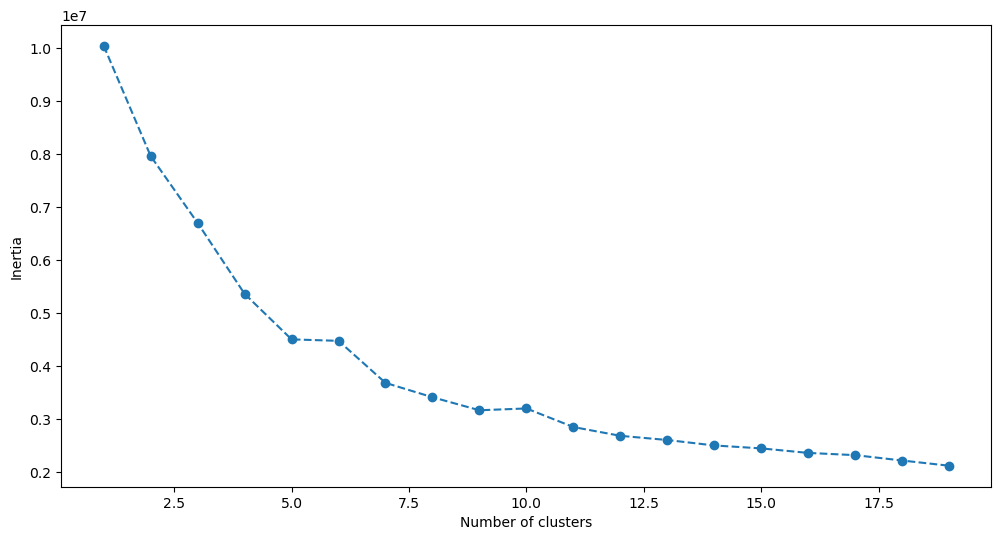

In [18]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Determine cluster stats

In [23]:
features = frame.columns[:-1]  # all columns except 'cluster'

# Compute basic statistics for each cluster
cluster_stats = frame.groupby('cluster')[features].describe()
cluster_stats


0                                                              \
            count      mean       std       min       25%       50%       75%   
cluster                                                                         
0         43054.0 -0.143693  0.746201 -0.733677 -0.530892 -0.504210 -0.109313   
1         89817.0 -0.362164  0.364123 -0.733677 -0.573583 -0.546901 -0.298116   
2         90478.0  1.774459  0.443188  0.344285  1.491620  1.934544  1.934544   
3        148648.0 -0.393820  0.270216 -0.733677 -0.573583 -0.525555 -0.248060   
4          3346.0  0.588516  1.319240 -0.706994 -0.562910 -0.210705  1.934544   
5        110176.0 -0.478025  0.253842 -0.733677 -0.573583 -0.573583 -0.498873   
6         76205.0  2.210453  0.659029 -0.029266  1.934544  1.934544  2.238721   
7         61609.0 -0.417652  0.400639 -0.733677 -0.573583 -0.530892 -0.466855   
8        217882.0 -0.507542  0.241560 -0.733677 -0.621611 -0.573583 -0.530892   
9         43108.0  1.829814  0.525919  0.205537  1.496956  1.934544  1.934544   
10       106211.0 -0.445866  0.292580 -0.733677 -0.573583 -0.573583 -0.440172   
11        81676.0 -0.360947  0.355878 -0.728340 -0.573583 -0.520219 -0.296088   
12        32902.0  3.526048  0.524804  2.148002  3.097888  3.535477  3.962392   
13       120165.0 -0.437499  0.312367 -0.733677 -0.573583 -0.573583 -0.427899   
14        77433.0 -0.190811  0.430500 -0.733677 -0.536228 -0.344116  0.018762   
15        73255.0 -0.304440  0.350962 -0.733677 -0.573583 -0.440172 -0.210705   
16         2834.0  0.250065  1.144270 -0.723004 -0.573583 -0.226715  0.617777   
17        87000.0 -0.257964  0.342498 -0.733677 -0.573583 -0.322771 -0.152004   
18       208663.0 -0.246342  0.374962 -0.733677 -0.573583 -0.370799 -0.103977   

                          1             ...         4                   5  \
              max     count       mean  ...       75%       max     count   
cluster                                 ...                                 
0        4.399980   43054.0  -0.098874  ... -0.457684  2.625818   43054.0   
1        1.934544   89817.0  -0.074326  ...  2.168239  2.629940   89817.0   
2        3.535477   90478.0   0.059643  ...  0.358537  2.625818   90478.0   
3        1.635703  148648.0  -0.075704  ...  0.494574  1.582869  148648.0   
4        4.442672    3346.0   8.667319  ...  0.358537  2.625818    3346.0   
5        1.934544  110176.0  -0.100220  ... -0.729758  0.020506  110176.0   
6        4.442672   76205.0   0.147326  ...  0.358537  2.625818   76205.0   
7        4.218541   61609.0  -0.139801  ... -0.754492  2.625818   61609.0   
8        1.731759  217882.0  -0.105589  ... -0.960608  0.102953  217882.0   
9        3.941046   43108.0   0.078533  ...  0.358537  2.625818   43108.0   
10       1.657049  106211.0  -0.107851  ... -0.853428  0.135931  106211.0   
11       2.468188   81676.0  -0.080747  ...  2.085793  2.632265   81676.0   
12       4.442672   32902.0   0.191653  ...  0.358537  2.625818   32902.0   
13       2.313432  120165.0  -0.103193  ... -0.733880  1.224226  120165.0   
14       1.934544   77433.0  -0.042312  ...  1.442709  2.625818   77433.0   
15       1.934544   73255.0  -0.070230  ...  0.638855  2.625818   73255.0   
16       4.442672    2834.0  20.979494  ...  0.358537  2.625818    2834.0   
17       1.240807   87000.0  -0.017271  ...  0.515186  2.625818   87000.0   
18       1.134078  208663.0  -0.045771  ...  0.358537  1.417975  208663.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.369093  0.698495 -3.458312  0.074846  0.814015  0.814015  0.814015  
1        0.265324  0.520376 -1.634388 -0.025832  0.280096  0.814015  0.814015  
2       -0.388639  0.604221 -2.407508 -1.039518 -0.319549  0.046863  0.814015  
3        0.113585  0.488435 -2.390368 -0.033925  0.046863 

In [24]:
from sklearn.preprocessing import StandardScaler
feature_names = ['Ammonia (mg/l)',
                'Biochemical Oxygen Demand (mg/l)',
                'Dissolved Oxygen (mg/l)',
                  'pH (ph units)',
                  'Nitrate (mg/l)',
                  'CCME_Values',
                ]
# Assuming you have a scaler object named 'scaler'
# And your scaled data is named 'data_scaled'
original_data = scaler.inverse_transform(data_scaled)
# Optionally, convert back to DataFrame with feature names
df_original = pd.DataFrame(original_data, columns=feature_names)

df_original

,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),pH (ph units),Nitrate (mg/l),CCME_Values
0,0.05152,3.90760,11.684103,8.3700,9.73940,100.0
1,0.07728,3.19160,10.033300,8.0167,8.72119,100.0
2,0.09016,3.77391,11.475000,7.7900,9.51805,100.0
3,0.10304,5.06000,11.733300,8.1583,8.63265,100.0
4,0.10304,4.43182,11.433300,7.7900,8.76546,100.0
...,...,...,...,...,...,...
1674457,0.02400,1.40000,4.293000,7.9000,0.37000,100.0
1674458,0.03800,1.40000,4.495500,7.9000,0.54000,100.0
1674459,0.03500,1.40000,4.464000,7.6000,0.79000,100.0
1674460,0.04600,1.40000,4.176000,8.0000,1.30000,100.0


In [25]:
df_original['cluster'] = frame['cluster'].values

In [26]:
cluster_stats_unscaled = df_original.groupby('cluster')[feature_names].describe()
cluster_stats_unscaled

Ammonia (mg/l)                                                    \
                 count      mean       std    min    25%    50%      75%   
cluster                                                                    
0              43054.0  0.110558  0.139831  0.000  0.038  0.043  0.11700   
1              89817.0  0.069618  0.068233  0.000  0.030  0.035  0.08162   
2              90478.0  0.470001  0.083049  0.202  0.417  0.500  0.50000   
3             148648.0  0.063686  0.050636  0.000  0.030  0.039  0.09100   
4               3346.0  0.247767  0.247213  0.005  0.032  0.098  0.50000   
5             110176.0  0.047907  0.047568  0.000  0.030  0.030  0.04400   
6              76205.0  0.551703  0.123496  0.132  0.500  0.500  0.55700   
7              61609.0  0.059220  0.075076  0.000  0.030  0.038  0.05000   
8             217882.0  0.042376  0.045266  0.000  0.021  0.030  0.03800   
9              43108.0  0.480375  0.098552  0.176  0.418  0.500  0.50000   
10            106211.0  0.053933  0.054827  0.000  0.030  0.030  0.05500   
11             81676.0  0.069846  0.066688  0.001  0.030  0.040  0.08200   
12             32902.0  0.798233  0.098343  0.540  0.718  0.800  0.88000   
13            120165.0  0.055501  0.058535  0.000  0.030  0.030  0.05730   
14             77433.0  0.101728  0.080672  0.000  0.037  0.073  0.14100   
15             73255.0  0.080435  0.065767  0.000  0.030  0.055  0.09800   
16              2834.0  0.184344  0.214426  0.002  0.030  0.095  0.25325   
17             87000.0  0.089144  0.064181  0.000  0.030  0.077  0.10900   
18            208663.0  0.091322  0.070264  0.000  0.030  0.068  0.11800   

               Biochemical Oxygen Demand (mg/l)              ...  \
           max                            count        mean  ...   
cluster                                                      ...   
0        0.962                          43054.0    2.125932  ...   
1        0.500                          89817.0    2.354656  ...   
2        0.800                          90478.0    3.602881  ...   
3        0.444                         148648.0    2.341813  ...   
4        0.970                           3346.0   83.803225  ...   
5        0.500                         110176.0    2.113393  ...   
6        0.970                          76205.0    4.419857  ...   
7        0.928                          61609.0    1.744599  ...   
8        0.462                         217882.0    2.063368  ...   
9        0.876                          43108.0    3.778886  ...   
10       0.448                         106211.0    2.042289  ...   
11       0.600                          81676.0    2.294828  ...   
12       0.970                          32902.0    4.832860  ...   
13       0.571                         120165.0    2.085692  ...   
14       0.500                          77433.0    2.652937  ...   
15       0.500                          73255.0    2.392819  ...   
16       0.970                           2834.0  198.519524  ...   
17       0.370                          87000.0    2.886249  ...   
18       0.350                         208663.0    2.620712  ...   

        Nitrate (mg/l)           CCME_Values                                  \
                   75%       max       count       mean       std        min   
cluster                                                                        
0                 2.52  10.00000     43054.0  93.988028  9.438350  42.270599   
1                 8.89  10.01000     89817.0  92.585865  7.031533  66.916195   
2                 4.50  10.00000     90478.0  83.749255  8.164474  56.469482   
3                 4.83   7.47000    148648.0  90.535512  6.599929  56.701086   
4                 4.50  10.00000      3346.0  63.399211  7.653805  39.590326   
5                 1.86   3.68000    110176.0  97.212728  4.871270  52.337584   
6                 4.50  10.00000     76205.0  49.929656  6.067510  36.152815   
7                 1.80  10.00000     6

In [27]:
# Example if your stats DataFrame is named cluster_stats_unscaled
cluster_stats_unscaled.to_csv("C:/Users/Leon/Documents/Github/CPE025A/cluster_statistics_unscaled.csv")


In [ ]:
cluster_stats_unscaled = df_original.groupby('cluster').agg({
    'pH (ph units)': ['std'],
    'Ammonia (mg/l)': ['mean'],
    'Nitrate (mg/l)': ['mean'],
    'Dissolved Oxygen (mg/l)': ['mean'],
    'Biochemical Oxygen Demand (mg/l)': ['mean']
})

# Flatten the MultiIndex columns
cluster_stats_unscaled.columns = [
    'pH_std', 'Ammonia_mean', 'Nitrate_mean', 'DO_mean', 'BOD_mean'
]

# Lower BOD, NH3, NO3 preferred; higher DO preferred; lower pH variance preferred.
cluster_stats_unscaled['score'] = (
    -cluster_stats_unscaled['BOD_mean']   # negative for lower is better
    + cluster_stats_unscaled['DO_mean']   # positive for higher is better
    - cluster_stats_unscaled['Nitrate_mean']
    - cluster_stats_unscaled['Ammonia_mean']
    - cluster_stats_unscaled['pH_std']    # negative for more stable pH
)

cluster_means = cluster_stats_unscaled.sort_values('score', ascending=False)
labels = []
for i, row in cluster_means.iterrows():
    if i < 4:
        labels.append(f'A{i+1}')
    elif i < 8:
        labels.append(f'B{i-3}')
    elif i < 12:
        labels.append(f'C{i-7}')
    else:
        labels.append(f'D{i-11}')
cluster_means['label'] = labels

# Assuming your clusters are 0-15 and labels are in same order
cluster_label_map = dict(zip(cluster_means.index, cluster_means['label']))
df_original['class_label'] = df_original['cluster'].map(cluster_label_map)


df_original.head()

class_label
A1     43054
A2     89817
A3     90478
A4    148648
B1      3346
B2    110176
B3     76205
B4     61609
C1    217882
C2     43108
C3    106211
C4     81676
D1     32902
D2    120165
D3     77433
D4     73255
D5      2834
D6     87000
D7    208663
Name: count, dtype: int64

In [33]:
ordered_labels = ['A1', 'A2', 'A3', 'A4',
                  'B1', 'B2', 'B3', 'B4',
                  'C1', 'C2', 'C3', 'C4',
                  'D1', 'D2', 'D3', 'D4']

df_subset = df_original.drop_duplicates('class_label')
df_subset = df_subset.set_index('class_label').reindex(ordered_labels).reset_index()
df_subset


,class_label,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),pH (ph units),Nitrate (mg/l),CCME_Values,cluster
0,A1,0.009789,2.133330,4.370800,7.447200,0.690612,100.000000,0
1,A2,0.077280,3.191600,10.033300,8.016700,8.721190,100.000000,1
2,A3,0.455093,12.590000,11.684103,7.880000,6.654135,91.649067,2
3,A4,0.014039,2.310000,11.684103,8.327270,5.836820,93.116725,3
4,B1,0.035000,113.500000,9.824000,8.006667,0.531667,64.759165,4
5,B2,0.097888,2.133330,10.075000,8.337500,1.651271,100.000000,5
6,B3,0.500000,10.000000,11.684103,7.790000,2.200000,51.548143,6
7,B4,0.100000,2.133330,5.716000,7.790000,0.000000,100.000000,7
8,C1,0.094024,1.530000,8.966700,7.790000,3.023641,100.000000,8
9,C2,0.482485,1.237500,9.824000,7.420800,5.304874,93.047735,9
